Text(0.5, 1.0, '$\\theta$')

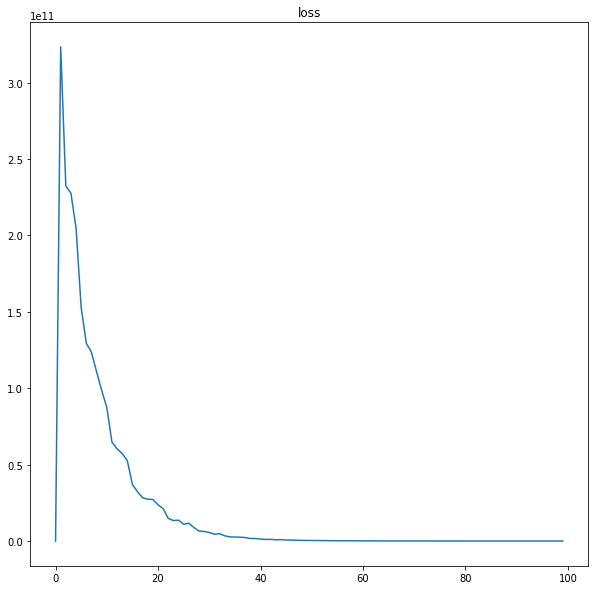

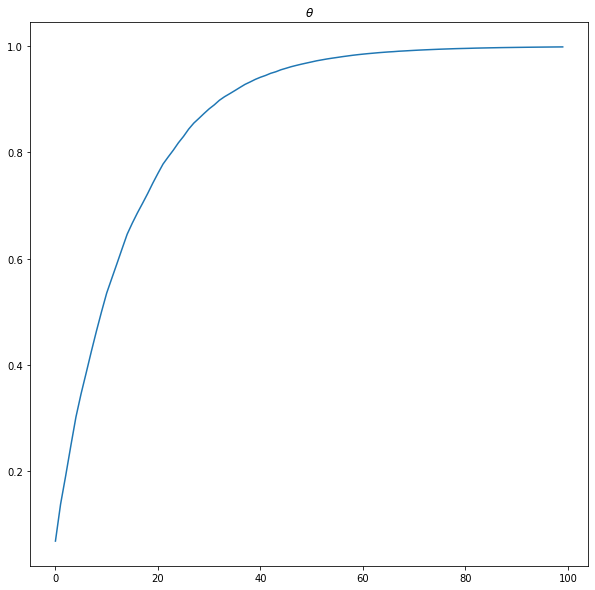

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.arange(1000000)
y_data = np.arange(1000000)

class plus_node():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
    def forward(self, x, y):
        self.x, self.y, self.z = x, y, x + y
        return self.z
    def backward(self, dL):
        return 1*dL, 1*dL
    
class minus_node():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
    def forward(self, x, y):
        self.x, self.y, self.z = x, y, x-y
        return self.z
    def backward(self, dL):
        return 1*dL, -1*dL

class mul_node():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
    def forward(self, x, y):
        self.x, self.y, self.z = x, y, x*y
        return self.z
    def backward(self, dL):
        return self.y*dL, self.x*dL
        
class square_node():
    def __init__(self):
        self.x, self.z = None, None
    def forward(self, x):
        self.x, self.z = x, np.square(x)
        return self.z
    def backward(self, dL):
        return 2*self.x*dL
    
class cost_node():
    def __init__(self):
        self.x, self.z = None, None
    
    def forward(self, x):
        self.x = x
        self.z = self.x.mean()
        return self.z
        
    def backward(self):
        return 1/len(self.x)*np.ones(shape=(len(self.x)))

train_size = x_data.shape[0]
batch_size = 100
theta = 0
lr = 0.0000000000001
epochs = 100

z1_node = mul_node()
z2_node = minus_node()
z3_node = square_node()
c_node = cost_node()

loss_list = []
theta_list = []

for i in range(epochs):
    
    gradient_np = np.empty(0)
    theta_np = np.empty(0)
    
    batch_mask = np.random.choice(train_size,batch_size)
    shuffled_x = x_data[batch_mask]
    shuffled_y = y_data[batch_mask]
    
    z1 = z1_node.forward(shuffled_x, theta)
    z2 = z2_node.forward(shuffled_y, z1)
    z3 = z3_node.forward(z2)
    
    gradient_np = np.append(gradient_np, z3)
        
    cost = c_node.forward(gradient_np)
    loss_list.append(cost)
    dz = c_node.backward()
    dz2 = z3_node.backward(dz)
    dy,dz1 = z2_node.backward(dz2)
    dx,dtheta = z1_node.backward(dz1)
    theta_np = np.append(theta_np, dtheta)
    theta = theta - lr*np.sum(theta_np)
    theta_list.append(theta)

fig, ax = plt.subplots(figsize = (10,10))
ax.plot(loss_list)
ax.set_title("loss")

fig, ax = plt.subplots(figsize = (10,10))
ax.plot(theta_list)
ax.set_title(r"$\theta$")